### Problem 1: Introduction to FFT
In this problem, you will calculate, explore, and plot a Fast Fourier Transform (FFT).

1. Start simply. Create some data with:
```
import numpy as np
N = 1024
t = np.arange(N)
g = np.sin(omega*t)
```
Plot the data `g` with `omega = 2*math.pi/100`.

2. The frequency content of the data can be explored by taking the FFT. Take the FFT of the data: `ghat = numpy.fft.fft(g)`. Print out the first 10 elements of `ghat`.

3. Hit a problem? The FFT is *complex* so we must choose what to plot: `ghat.real` or `ghat.imag`; these real and imaginary parts are attributes of the `ghat` object. Also, for a proper normalization, the FFT should generally be divided by the number of points in the data.
Try making plots of the real, imaginary, and absolute value of `ghat` vs. the index of the array elements.

4. You should now have a plot with two peaks. The FFT returns results for both positive and negative frequencies $-f_{\rm max} \leq f \leq f_{\rm max}$, the latter packed by convention into the top half of the array. (This convention is not restricted to Python; in fact the FFT used by Numpy is from a standard Fortran package, FFTPACK (or perhaps the C rewrite, fftpack). We can restrict the
plot to positive (plus 0) or negative frequencies by using array slices:
```
ghat_pos = ghat[:N/2+1]
ghat_neg = ghat[N/2+1:]
```
If we then appended `ghat_pos` to the end of `ghat_neg`, we would then have it in order of increasing frequency. Note that this can be done easily using `numpy.fft.fftshift`. Why have we used `N = 1024`? The FFT works best with the number of points equal to a power of two (the algorithm works by dividing the data into halves, quarters, etc). You can try 128, 2048, etc.

5. One nice thing about the default packing is that `ghat[0]` is the frequency $=0$ term, `ghat[1]` is the smallest positive frequency term, while `ghat[-1]` is the smallest negative frequency. In general, `ghat[n]` ($n < N/2$) corresponds to $f = n\Delta f$, while `ghat[-n]` corresponds to $f = -n\Delta f$, where $\Delta f = 1/(t_{\rm max}-t_{\rm min}$).

6. Now, how do we get $N$ complex numbers out of the FFT, when we only had $N$ real numbers going in? Each complex numbers contains two pieces of information. Did we just double our information? Examine a few positive frequency elements in `ghat`, and compare them to the corresponding negative frequency elements. What do you see? Do we really have double the information? There is a function `numpy.fft.rfft`, which we can use when we know the input is real. Try it. How does the output differ from `fft`?

7. What about a proper scale for the time or frequency axis? The time step for our input data is `dt = t[1] - t[0]`. The largest period we can determine is the total time range of our input data, `T = N * dt`. Since the frequency is the inverse of the period, the smallest frequency step we can measure is $\Delta f = 1/T$.
The largest frequency we can measure is $f_{\rm max} = \tfrac{N}{2}\Delta f =\tfrac{1}{2\Delta t}$.
Note that the frequency step is determined only by the range of the data, not by the time step! To make the frequency step smaller, i.e. to observe lower frequencies, we need to extend the range of the data over a longer time. The maximum frequency we can access is determined by the time step. Make sense? Make an array with the proper frequency step to match up with the positive frequency elements of `ghat`. You can generate the array of frequencies manually or use `numpy.fft.fftfreq`. Make a plot of the absolute value of `ghat`. What positive frequency corresponds to the largest amplitude in `ghat`? (Investigate the functions `max` and `argmax`.)

8. Now add another term to `g` at a different frequency. Do you get two peaks? Add more. Play.

9. Rather than working with the complex data, it is often useful to work with the power spectrum or intensity of the spectrum. This is defined by $P(\omega) = |\hat{g}^*(\omega)\hat{g}(\omega)|$. This can be coded as `powerspectrum = (ghat * ghat.conjugate()).real / len(ghat)**2`. Note that we have divided by the square of the number of points for normalization. This is probably a very useful bit of code. We can make it into a function:
```
def PowerSpectrum(f):
    return (f*f.conjugate()).real/len(f)**2
```
and use it like `powerspectrum = PowerSpectrum(ghat)`.

10. The Nyquist frequency is defined as:

\begin{align*}
\omega_{N_y} &= N\Delta\omega/2 = (2\pi/\Delta t)/2\\
f_{N_y} &= N\Delta f/2 = (1/\Delta t)/2
\end{align*}

Given your time step, what is the Nyquist frequency? Set `g` to be a simple sine wave with a single frequency ($g = \sin(\omega t)$) which is small compared to the Nyquist frequency, say $\omega = 0.1 \omega_{N_y}$. How does the peak of the power-spectrum compare to the actual
frequency? Try $\omega = 0.2 \omega_{N_y}$, $\omega = 0.4 \omega_{N_y}$, $\omega = 0.8 \omega_{N_y}$, $\omega = 1.6 \omega_{N_y}$. What do you see? The problem you may observe is called aliasing.

* Plot the sine wave and its power spectrum, with both plots properly scaled and labeled.
* Describe the results of each step in the sequence.

------

PARTS 1-5

[ 14.41223125 +0.j          14.55585243 -1.56662661j
  15.00380397 -3.22642118j  15.81269779 -5.0919905j
  17.09808391 -7.32400711j  19.08184047-10.18649633j
  22.21066533-14.17605744j  27.49713698-20.38703884j
  37.77713065-31.85188044j  65.05472280-61.36355786j]


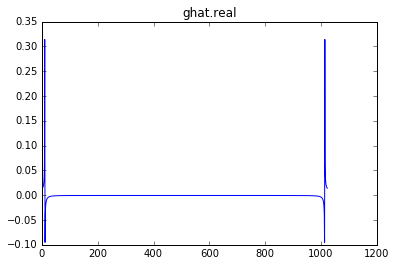

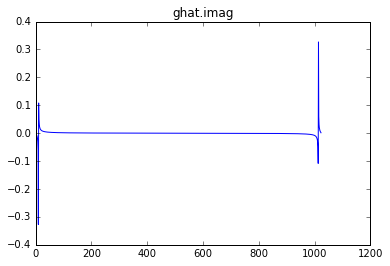

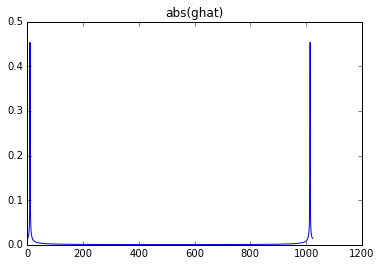

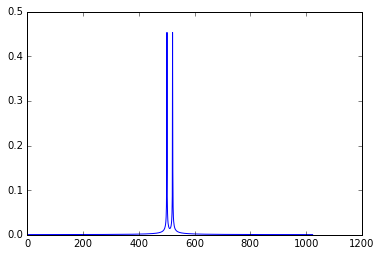

ghat[5], ghat[-5]
(0.018634609834-0.00994775032509j) (0.018634609834+0.00994775032509j)
ghat[37], ghat[-37]
(-0.00170038365343+0.00463063208132j) (-0.00170038365343-0.00463063208132j)
We didn't really double our data. The real component of ghat[i]is equal to that of ghat[-i], and the complex components haveopposite sign. It's more like we have the same information doubled.
ghat_rfft:
 [ 0.01407444+0.j          0.01421470-0.00152991j  0.01465215-0.0031508j
  0.01544209-0.00497265j  0.01669735-0.00715235j  0.01863461-0.00994775j
  0.02169010-0.01384381j  0.02685267-0.01990922j  0.03689173-0.03110535j
  0.06353000-0.05992535j]
the difference between ghat_rfft and ghat is that is seems like
the values for ghat_rfft are normalized, since they are about 1000
times smaller. We have 1024 points, so that makes sense.


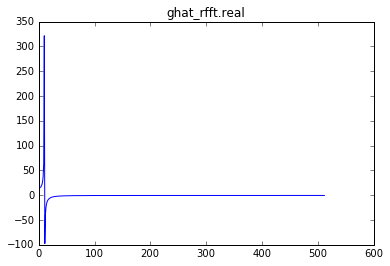

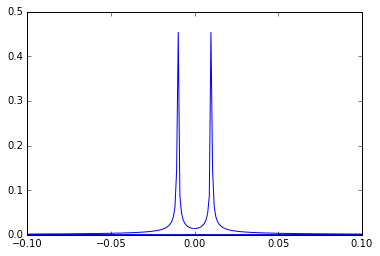

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

print('PARTS 1-5\n')

N = 1024
t = np.arange(N)
omega = 2*np.pi/100
g = np.sin(omega*t)

ghat = np.fft.fft(g)

print(ghat[:10])


ghat /= len(ghat)

plt.plot(ghat.real)
plt.title('ghat.real')
plt.show()

plt.plot(ghat.imag)
plt.title('ghat.imag')
plt.show()

plt.plot(np.abs(ghat))
plt.title('abs(ghat)')
plt.show()

ghat_pos = ghat[:N//2+1]
ghat_neg = ghat[N//2+1:]

ghat_shift = np.append(ghat_neg, ghat_pos)

plt.plot(np.abs(ghat_shift))
plt.show()

print('ghat[5], ghat[-5]')
print(ghat[5], ghat[-5])
print('ghat[37], ghat[-37]')
print(ghat[37], ghat[-37])
print('We didn\'t really double our data. The real component of ghat[i]'
      'is equal to that of ghat[-i], and the complex components have'
      'opposite sign. It\'s more like we have the same information doubled.')

ghat_rfft = np.fft.rfft(g)
print('ghat_rfft:\n', ghat[:10])
print('the difference between ghat_rfft and ghat is that is seems like\n'
       'the values for ghat_rfft are normalized, since they are about 1000\n'
       'times smaller. We have 1024 points, so that makes sense.')

plt.plot(ghat_rfft.real)
plt.title('ghat_rfft.real')
plt.show()

freq = np.fft.fftfreq(1024, t[1]-t[0])
plt.plot(freq, np.abs(ghat))
plt.xlim(-1/10, 1/10)
plt.show()



PART 7


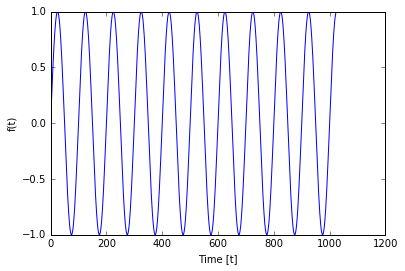

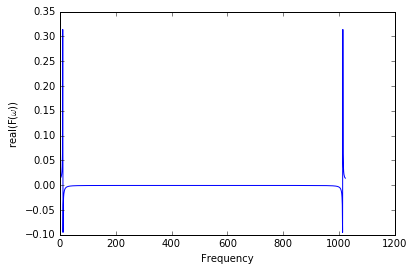

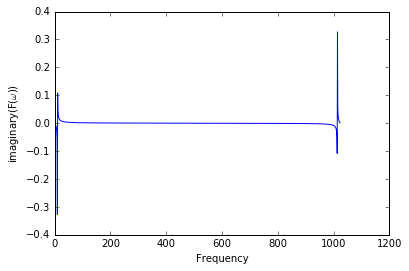

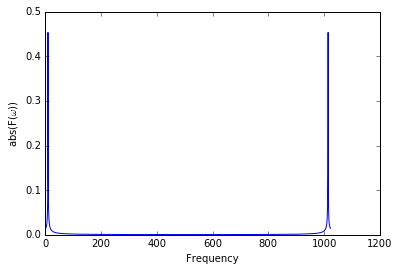

Max frequency 0.009765625


In [61]:
print('PART 7')

frequencies = np.fft.fftfreq(1024,100)

plt.plot(t, g)
plt.xlabel("Time [t]")
plt.ylabel("f(t)")
plt.show()

plt.plot(np.real(ghat))
plt.xlabel("Frequency")
plt.ylabel(r"real(F($\omega$))")
plt.show()

plt.plot(np.imag(ghat))
plt.xlabel("Frequency")
plt.ylabel(r"imaginary(F($\omega$))")
plt.show()


plt.plot(np.abs(ghat))
plt.xlabel("Frequency")
plt.ylabel(r"abs(F($\omega$))")
plt.show()
    
max_index = np.argmax(np.abs(ghat))
max_freq = freq[max_index]
print("max frequency", max_freq)

PART 8
When you add another term with a different frequency,
you get another peak!!
for function f(t)
[ 23.37802451 +0.j          23.53280970 -1.37592737j
  24.01442910 -2.84352462j  24.88002907 -4.51386089j
  26.24607412 -6.54598963j  28.33577443 -9.20218933j
  31.59763397-12.97713055j  37.04659154-18.96298595j
  47.52154758-30.18969133j  75.03042008-59.44728551j]


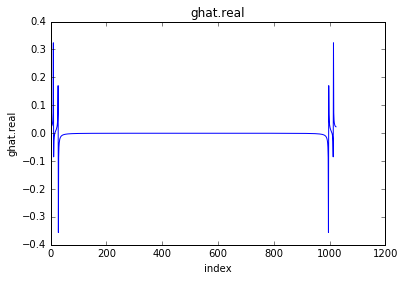

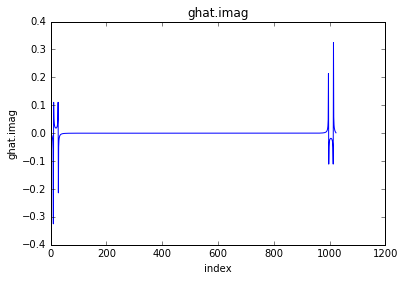

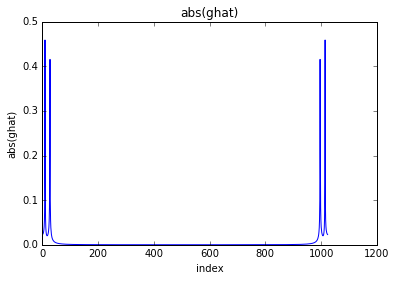

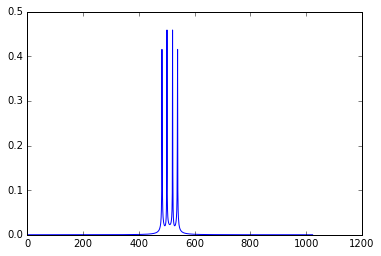

for function g(t)
[ 11.82700961 +0.j          11.97307668 +1.78087554j
  12.42936650 +3.65167467j  13.25583556 +5.72063952j
  14.57496908 +8.14128114j  16.62222310+11.16437292j
  19.87217046+15.25938503j  25.40164443+21.45751263j
  36.22868272+32.61047332j  65.13396308+60.73644047j]


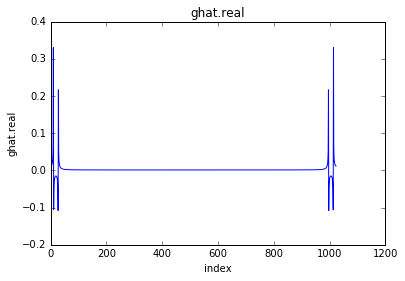

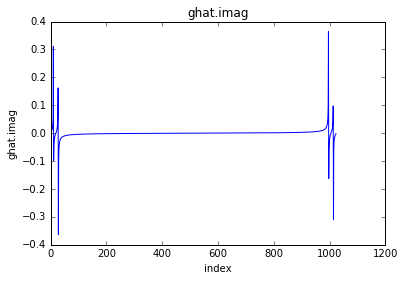

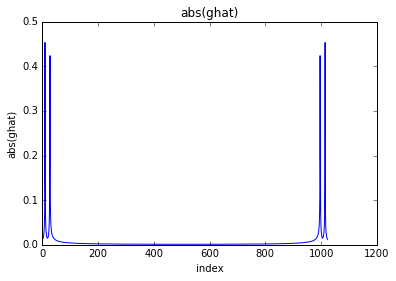

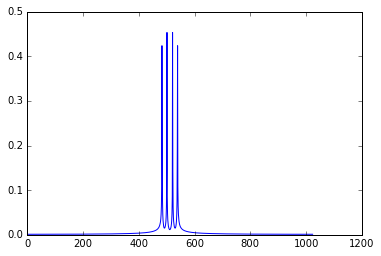

for function h(t)
[ 15.13877378 +0.j          15.28241475 -1.56017475j
  15.73042568 -3.21351644j  16.53941851 -5.07263087j
  17.82494328 -7.29818953j  19.80887820-10.15421676j
  22.93792118-14.13731079j  28.22465078-20.34181901j
  38.50494234-31.80018032j  65.78287242-61.3053693j ]


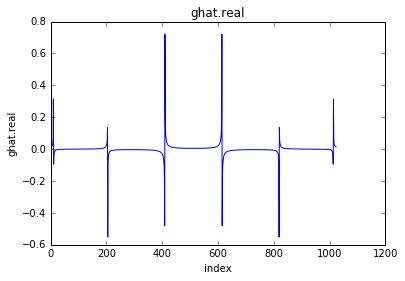

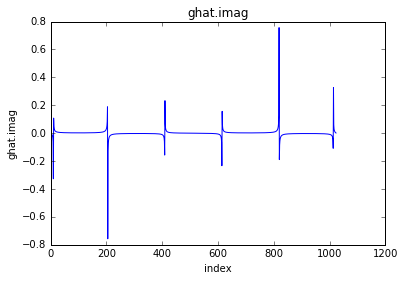

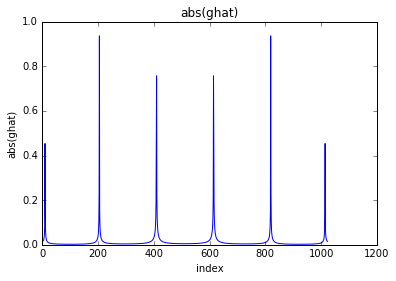

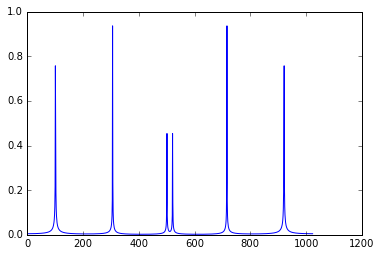

In [81]:
print('PART 8')
print('When you add another term with a different frequency,\n'
       'you get another peak!!')

def part_8(func):
    N = 1024
    t = np.arange(N)
    omega = 2*np.pi/100
    gg = func(t)

    gghat = np.fft.fft(gg)

    print(gghat[:10])

    gghat /= len(gghat)

    plt.plot(gghat.real)
    plt.title('ghat.real')
    plt.xlabel('index')
    plt.ylabel('ghat.real')
    plt.show()

    plt.plot(gghat.imag)
    plt.title('ghat.imag')
    plt.xlabel('index')
    plt.ylabel('ghat.imag')
    plt.show()

    plt.plot(np.abs(gghat))
    plt.title('abs(ghat)')
    plt.xlabel('index')
    plt.ylabel('abs(ghat)')
    plt.show()

    gghat_pos = gghat[:N//2+1]
    gghat_neg = gghat[N//2+1:]

    gghat_shift = np.append(gghat_neg, gghat_pos)

    plt.plot(np.abs(gghat_shift))
    plt.show()
    
def f(t):
    return np.sin(omega*t) + np.sin(2*np.pi/37*t)

def g(t):
    return np.cos(omega*t) + np.cos(2*np.pi/37*t)

def h(t):
    return np.sin(omega*t) + np.tan(omega*t*10)

print('for function f(t)')
part_8(f)
print('for function g(t)')
part_8(g)
print('for function h(t)')
part_8(h)

PART 9


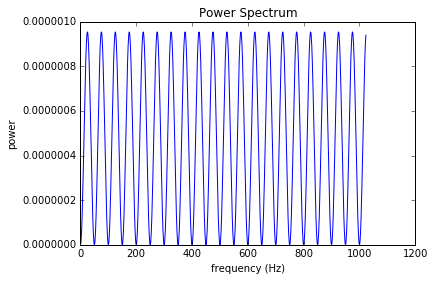

In [54]:
print('PART 9')

power_spec = power_spectrum(g)

plt.plot(power_spec)
plt.xlabel('frequency (Hz)')
plt.ylabel('power')
plt.title('Power Spectrum')
plt.show()

Nyquist freq: 12.5418269218
scalar multiple: 0.1
max power spectrum: 0.141058720606
difference between max power spectrum and nyquist: 12.4007682011


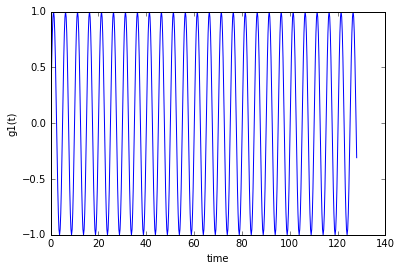

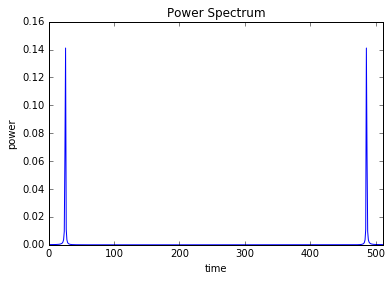

Nyquist freq: 12.5418269218
scalar multiple: 0.2
max power spectrum: 0.218045776921
difference between max power spectrum and nyquist: 12.3237811448


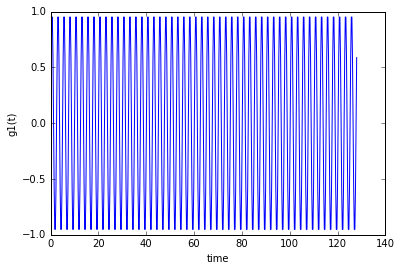

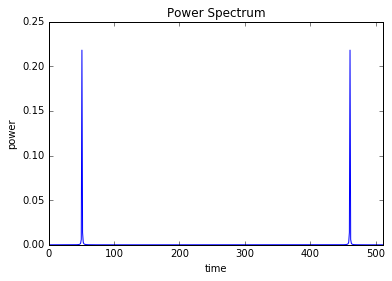

Nyquist freq: 12.5418269218
scalar multiple: 0.4
max power spectrum: 0.142969342897
difference between max power spectrum and nyquist: 12.3988575789


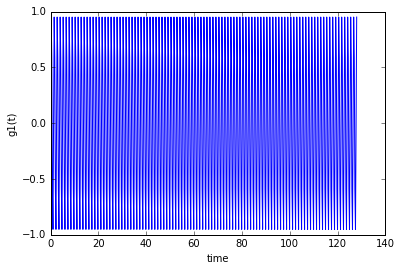

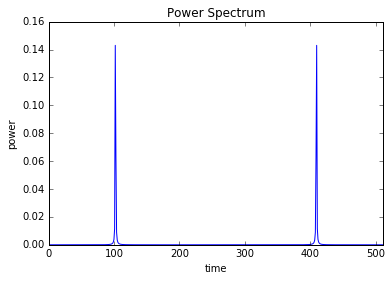

Nyquist freq: 12.5418269218
scalar multiple: 0.8
max power spectrum: 0.218045776921
difference between max power spectrum and nyquist: 12.3237811448


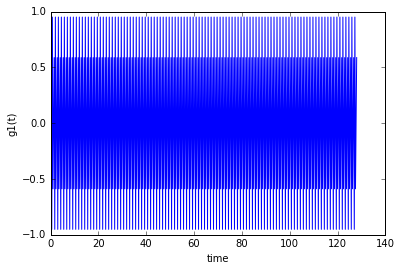

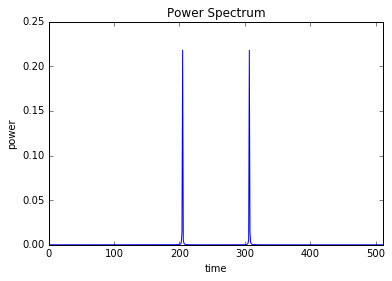

Nyquist freq: 12.5418269218
scalar multiple: 1.6
max power spectrum: 0.142969342897
difference between max power spectrum and nyquist: 12.3988575789


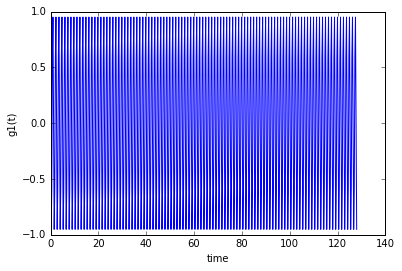

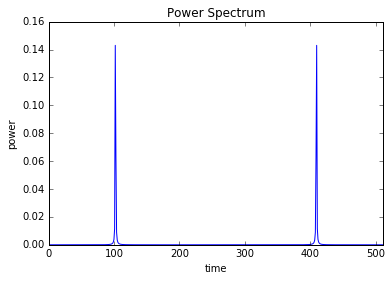

In [95]:
def part_10(c):
    t= np.linspace(0,128,512)
    dt = t[1]-t[0]
    nyfreq = np.pi/dt
    g1 = np.sin(c*nyfreq*t)
    ghat1 = np.fft.fft(g1)
    plt.plot(t, g1)
    plt.xlabel('time')
    plt.ylabel('g1(t)')

    print('Nyquist freq:', nyfreq)
    print('scalar multiple:', c)
    
    ps = power_spectrum(ghat1)
    print('max power spectrum:', max(ps))
    print('difference between max power spectrum and nyquist:', abs(max(ps - nyfreq)))
    
    plt.show()
    plt.plot(ps)
    plt.title('Power Spectrum')
    plt.ylabel('power')
    plt.xlabel('time')
    plt.xlim(0,512)
    plt.show()


part_10(.1)
part_10(.2)
part_10(.4)
part_10(.8)
part_10(1.6)

I'm note really sure of what going on with the difference between the power spectrum, because I do not see a definitive pattern of any sort...

Aliasing is the effect that causes different signals to become essentially identical when sampled. I assume that the differences I just mentioned were supposed to get smaller and smaller? 

### Problem 3: FFT of Anharmonic Motion
Calculate the FFT of the motion of an anharmonic oscillator.  

Begin with the code you wrote for Problem 3 of Problem Set 7. Plot the displacement $x$ over time and the power spectrum (plot with points and lines, and use a log scale on the $y$-axis). Start with data generated with $x_0=1.0$, $dt=0.1$, and $N=1024$ with the `RK4` method, and include both plots in your pdf for two vales of $m$: $m=1$ and $m=7$. Be sure to label your plots and make the $x$ values in your power spectrum correspond to frequency $f$ in Hz if the time step $dt$ is in seconds. Describe the differences between the power spectrum of the harmonic oscillator $m=1$ and the anharmonic oscillator $m=7$ in your pdf, and discuss the origin of the differences.

------

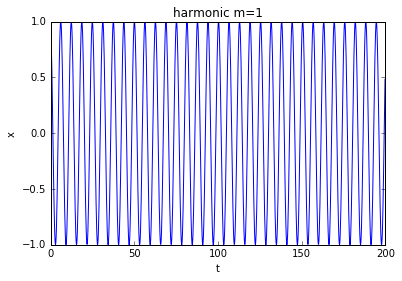

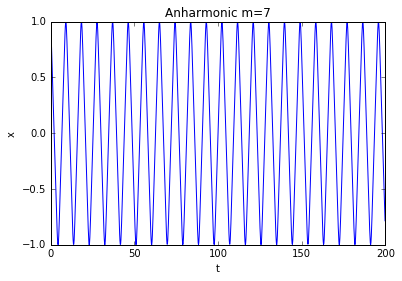

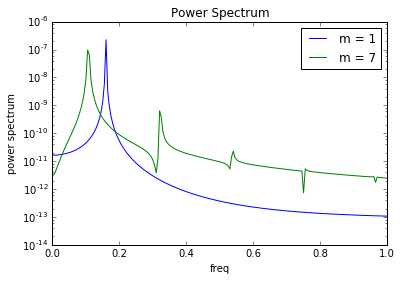

In [89]:
def rk4_step(func, r, t, dt):
    k1 = dt * func(r, t)
    k2 = dt * func(r + k1/2, t + dt/2)
    k3 = dt * func(r + k2/2, t + dt/2)
    k4 = dt * func(r + k3,   t + dt)
    r += (1/6) * (k1 + 2*k2 +2*k3 + k4)
    return r

def rk4(func, r, t):
    num_variables = len(r)
    y = np.zeros((len(t), num_variables))
    y[0,:] = r
    for i in range(0, len(t)-1):
        dt = t[i+1] - t[i]
        y[i+1,:] = rk4_step(func, y[i,:], t[i], dt)
    return y

def anharmonic1(r, t):
    x, v = r[0], r[1]
    return np.array([v, -x])

def anharmonic7(r, t):
    x, v = r[0], r[1]
    return np.array([v, -x**7])

def plot_anharmonic(t_max, N):
    t = np.linspace(0, t_max, N)
    r = [1 , 0]
    
    data1 = rk4(anharmonic1, r, t)
    X1, V1 = data1[:,0], data1[:,1]
    plt.plot(t, X1)
    plt.title('harmonic m=1')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.show()
    
    data7 = rk4(anharmonic7, r, t)
    X7, V7 = data7[:,0], data7[:,1]
    plt.plot(t, X7)
    plt.title('Anharmonic m=7')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.show()
    
    
    
    ghat1 = np.fft.fft(X1)
    ghat7 = np.fft.fft(X7)
    
    ghat1 /= len(ghat1)
    ghat7 /= len(ghat7)

    time_range = t[-1]-t[0]
    freq = np.arange(len(ghat1))/time_range
    
    plt.plot(freq, power_spectrum(ghat1), label='m = 1')
    plt.yscale('log')
    
    plt.plot(freq, power_spectrum(ghat7), label='m = 7')
    plt.yscale('log')
    
    plt.title('Power Spectrum')
    plt.xlabel('freq')
    plt.ylabel('power spectrum')
    plt.legend(loc='best')
    plt.xlim(0,1)
    plt.show()
    
def power_spectrum(f):
    return (f*f.conjugate()).real/len(f)**2
    
plot_anharmonic(200, 1024)

The most notable difference between the power spectrums is that m = 1 has only one peak while m = 7 has several. This is precisely because when m = 7, the oscillation isn't at just one frequency! That's only true for the m = 1 case! 

### Problem 4: A Hard Day's Night
Note that there are two additional files in the repository for this week's homework: `waveIO.py` and `AHDN.wav`.  These are here to support this problem.

Write a function that does the following:

1. Look at `waveIO.py` and read through the funtions.

2. Create and run a code cell with line `import waveIO`.  This will allow you to use the functions devined in `waveIO.py`.

3. Read in the `.wav` file, and unpack it into a numpy array.

4. Perform a Fast Fourier Transform on the last part of the numpy array. The size you should use should be the largest power of 2 that is less than the length of the array containing the entire sound clip.

5. Make plot of the data with the waveform in the upper plot, and the power spectrum in the lower plot. To make the number of plot points reasonable, only plot every 10th point of the waveform. Your power spectrum data will probably extend further than the highest frequency with any major amplitude, so only plot the lower $\sim 20$ % of frequencies.

6. Find all frequencies at which the power spectrum is larger than some threshold. You will need to plot the spectrum and examine it to determine the appropriate cutoff.

7. Include a function to convert the frequency to the nearest midi
note number, $p$.
\begin{equation*}
p = 69 + 12 \log_2({\rm frequency}/440 {\rm Hz})
\end{equation*}
8. Include a separate function that given a midi note number[1], returns a string representing the note in scientific pitch notation[2]. ($f = 440$ Hz has midi number $p = 69$, and Scientific Pitch Notation `A4`)  
[1] https://en.wikipedia.org/wiki/MIDI_Tuning_Standard  
[2] http://en.wikipedia.org/wiki/Scientific_pitch_notation  

(Hint: Using integer arithmetic, `p//12` should give some indication of which octave you are in, while `p%12` could be used to tell you which note you have within an octave.)

9. Print a nicely formatted table that includes the frequency, midi number, and the scientific pitch notation for each frequency above your cutoff.


------

In [2]:
import wave
import numpy

# The following are correct for the file I provided.
# For other files, investigate how to the info using the wave module.
SAMPLE_WIDTH = 2    # 16-bit = 2 bytes
N_CHANNELS = 1      # 1=mono,2=stereo
SAMPLE_RATE = 44100 # Hz, 
    

def read_wav_file(name):
    """
    This function reads a WAV file named 'name' and returns
    the contents as a packed string.
    """

    # Open wave file for reading
    w = wave.open(name, 'rb')

    # Read the entire wave file as a raw string.
    # Caution, this could use a lot of memory!
    # If worried, modify this 
    rawdata = w.readframes(w.getnframes())
    
    return rawdata
    


def unpack(data):
    """
    This function extracts a raw byte string into an array of
    16-bit integers.
    """
    import audioop

    undata = numpy.empty(len(data)//2, dtype=numpy.int16)
    for i in range(0, len(data)//SAMPLE_WIDTH):
        undata[i] = audioop.getsample(data,SAMPLE_WIDTH,i)

    return undata

def pack(data):
    """
    Pack a list of wav samples back into a string for audio
    output. This function returns the raw data as a string.
    """
    import cStringIO
    import struct
    
    sio = cStringIO.StringIO() # For storing packed string

    for d in data:
        sio.write(struct.pack('h',d))

    return sio.getvalue()

def write_wav_file(name,data):
    """
    Save the packed string in 'data' as a wave file
    with name given by string 'name'.
    """
    w = wave.open(name, 'wb')
    w.setnchannels(N_CHANNELS)
    w.setsampwidth(SAMPLE_WIDTH)
    w.setframerate(SAMPLE_RATE)
    w.setnframes(len(data)/SAMPLE_WIDTH) 
    w.writeframesraw(data)
    w.close()
    
def play(data):
    """
    Play data (either packed or unpacked) using pyaudio.
    """
    import pyaudio
    p = pyaudio.PyAudio()

    # open stream
    stream = p.open(format = pyaudio.paInt16,   
                    channels = N_CHANNELS,
                    rate = SAMPLE_RATE,
                    output = True)
    stream.write(data)
    stream.close()
    p.terminate()

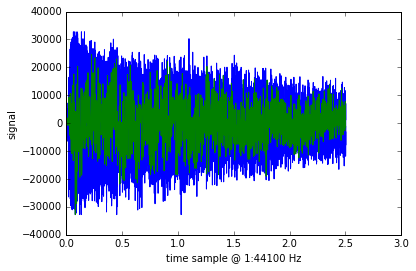

In [5]:
def power_spectrum(f):
    return (f*f.conjugate()).real/len(f)**2

packed_bytes = read_wav_file('AHDN.wav')
data = unpack(packed_bytes)

len(data)

time = np.arange(len(data))/SAMPLE_RATE

subsample_rate = 100
subsample = slice(0, len(data), subsample_rate)

plt.plot(time, data, label='full data')
plt.plot(time[subsample], data[subsample], label='subsample A1:{}'.format(SAMPLE_RATE))
plt.xlabel('time sample @ 1:{} Hz'.format(SAMPLE_RATE))
plt.ylabel('signal')

N = 2**int(np.log2(len(data)))

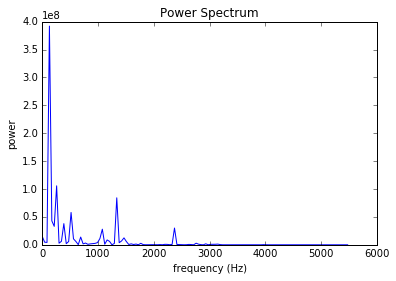

frequency:	 41.5006245863
midi:		 -17.3567665536
note:		 f#
octave:		 -3.0 

frequency:	 41.5006245863
midi:		 -12.3763165623
note:		 b
octave:		 -3.0 

frequency:	 41.5006245863
midi:		 -8.51317942365
note:		 d#
octave:		 -2.0 

frequency:	 41.5006245863
midi:		 -5.35676655364
note:		 f#
octave:		 -2.0 

frequency:	 41.5006245863
midi:		 1.66278345501
note:		 c#
octave:		 -1.0 

frequency:	 41.5006245863
midi:		 6.64323344636
note:		 f#
octave:		 -1.0 

frequency:	 41.5006245863
midi:		 23.0740391623
note:		 b
octave:		 0.0 

frequency:	 41.5006245863
midi:		 33.0
note:		 a
octave:		 1.0 



In [65]:
def freq_to_midi(freq):
    return 69 + 12 * np.log2(freq / 440)

def midi_to_scientific(midi):
    octave = midi//12 - 1
    note = int(midi%12)
    return note, octave

window = slice(-(N+1), -1, 1)
data_sample = data[window]
time_sample = time[window]

delta_freq = 1/(time_sample[-1] - time_sample[0])
freq = delta_freq*np.arange(N//2)

ghat = np.fft.fft(data_sample)

main_freq_interest = slice(0, int(N/2/4), 1)
power_spec = power_spectrum(ghat[main_freq_interest])

plt.plot(freq[main_freq_interest], power_spec)
plt.xlabel('frequency (Hz)')
plt.ylabel('power')
plt.title('Power Spectrum')
plt.show()

threshold_f = 0.3e8


notes = ['c','c#','d','d#','e','f','f#','g','g#','a','a#','b']

for i in range(len(power_spec)):
               
    if power_spec[i] > threshold_f:
               
        midi = freq_to_midi(i)
        note, octave = midi_to_scientific(midi)
               
        print('frequency:\t', f)               
        print('midi:\t\t', midi)
        print('note:\t\t', notes[note])
        print('octave:\t\t', octave, '\n')

The notes of the chord (according to this analysis) are listed above! This is actually super wrong and needs to be fixed!